# Refresher
Previously we discussed the entirety of Introduction to Quantum Computing. I'd like to treat that previous week as an overview or a quick rundown on the content of the upcoming chapters. So this week we are covering The Atoms of Computation. 

Last week, in our rundown, we learned about the basics of Quantum Computers: What they are, why they are useful, the basics of entangled states, and even dove into Grover's Search Algorithm. We learned about computational complexity which was the rate in which an algorithm uses resources as the size of the input increases. We discussed how quantum computers offer an improvement of this complexity in comparison to some of our best classical computer algorithms. 

Let's dive back into our current progress.

https://learn.qiskit.org/course/introduction/the-atoms-of-computation#the-1-0

# The Atoms of Computation
## Binary Values
We have all seen binary values before. As soon as you see number like $1001010110101$, you recognize this as binary, but what do these values represent? 

| **Binary**  | 000 | 001 | 010 | 011 | 100 | 101 | 110 | 111 |
|-------------|-----|-----|-----|-----|-----|-----|-----|-----|
| **Decimal** | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   |


![image](https://img.uline.com/is/image/uline/H-7350?$Mobile_SI$)

I personally like to think of binary values as a counter. Whenever we are adding a value, we are pressing on the counter which will roll to the next digit whenever it maxes out. So when you press the counter on the value $001$, it turns into the value $010$.

Binary is a base 2 number system (0, 1) while our decimal system is a base 10 number system (0, 1, 2, ..., 9). We can break down our numbers into the individual digits that make up the number:  

$$213 = 200 + 10 + 3$$  
$$(2 * 10^2) + (1 * 10^1) + (3 * 10^0)$$

We can do this same thing with binary values:  
$$101 = 100 + 00 + 1$$  
$$(1 * 2^2) + (0 * 2^1) + (1 * 2^0)$$  
$$5 = 4 + 0 + 1$$


## Quantum Circuits
Let's create a basic Quantum Circuit with Qiskit and examine what we can do with it:

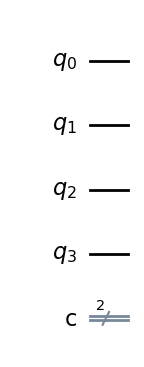

In [14]:
# import standard libraries
import qiskit
from qiskit.visualization import plot_bloch_multivector 
import numpy as np
import pylatexenc 
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

# Create a Quantum Circuit
circuit = QuantumCircuit(4, 2)

# Display the Circuit
display(circuit.draw('mpl'))

We could interact with this circuit through the Jupyter Notebook here, but instead lets move to the Qiskit Quantum Composer and mess around with that we could do. I would recommend making an account if you haven't already to mess with circuits and quantum states.  

Now that we understand the basic gates, lets develop the adder circuit that they discussed in the qiskit textbook:

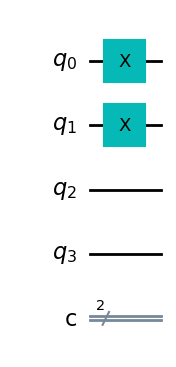

In [8]:
# Add not gates that resemble our input (in this case it is 11)
circuit.x([0, 1])

# Display the Circuit
display(circuit.draw('mpl'))

When we think of adding, we can break down the logic based on how we want our inputs to effect our outputs. The first digit of our output should be 0 when both of the inputs are 0 or both are 1. This resembles a XOR logic gate. We can achieve this by having 2 CNOT gates from both inputs to the first digit of the output.

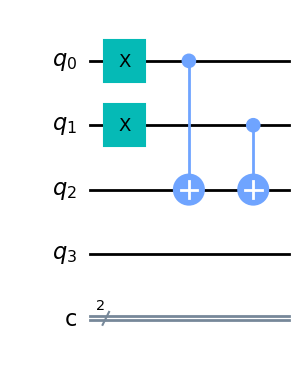

In [9]:
# Add CNOT from the first input digit to the first output digit
circuit.cx(0, 2)
# Add CNOT from the seconf input digit to the first output digit
circuit.cx(1, 2)

# Display the Circuit
display(circuit.draw('mpl'))

For the second output digit, its value should be 1 when both the inputs are 1 and 0 for every other option. This resembles the AND logic gate. Luckily we have a gate called the Toffoli gate that can achieve just that. It is a type of CNOT gate that instead has 2 controls rather than 1. So when both the controls have the value of one, it will swap the value of the target qubit. 

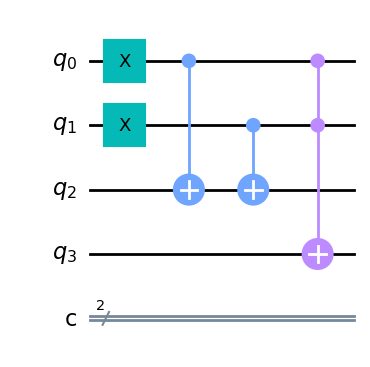

In [10]:
# Add Toffoli gate from the inputs to the second output digit
circuit.ccx(0, 1, 3)

# Display the Circuit
display(circuit.draw('mpl'))

Now we need to measure the quantum state and return the binary values of the circuit. We can do this by adding measurements to both of the output qubits.

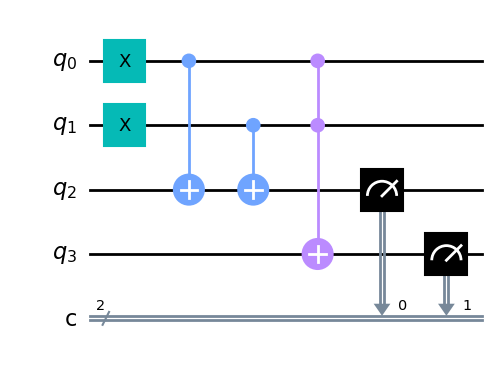

In [13]:
# Add Measurements to both output qubits
circuit.measure([2,3], [0,1])

# Display the Circuit
display(circuit.draw('mpl'))

Since this chapter was extremely short, I would like to introduce Hadamard gates. This is the gate that will introduce us to superposition. The Hadamard gate places the qubit in a state between $|1\rangle$ and $|0\rangle$. What this means is when we measure this qubit, half of the time it will measure to be 1, and half of the time it will measure to be 0. We will jump back over to the Qiskit Quantum Composer to demonstrate this.